In [1]:
import pandas as pd
import numpy as np
import re
import json
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [2]:
punctuations = string.punctuation
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()

In [3]:

def spacy_tokenizer(sent):
    tokens = parser(sent)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    return tokens


def clean_text(text):
    return text.strip().lower()

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def run_model(X_train, X_test, y_train, y_test, clf):
    tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)
    #clf.fit(X_train, y_train)
    model = Pipeline([
                    ("cleaner", predictors()),
                    ('vectorizer', tfidf_vector),
                    ('classifier', clf)
                    ])


    model.fit(X_train,y_train)
    return model

def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    #pred_y = model.predict(X_test)
    #mostrar_resultados(y_test, pred_y)



In [5]:
with open("_data/reviews.json", encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

In [6]:
fix = [v for v in data['reviews']]

In [7]:
reviews=pd.DataFrame.from_dict(fix, orient='columns', dtype=None, columns=None)

In [ ]:
reviews.head()

#reviews.info()

#reviews.stars.value_counts()


In [10]:
"""
Excluyo los neutros. 
"""

'\nExcluyo los neutros. Quizàs se overfittea. \n'

In [8]:
neutral_reviews = reviews[reviews.stars == 3]
reviews = reviews[reviews.stars != 3]

In [9]:
reviews['sentiment'] = np.where(reviews.stars>3, 1, 0)

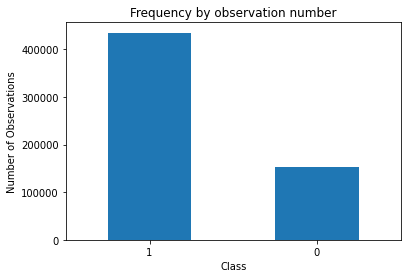

In [11]:
count_classes = pd.value_counts(reviews['sentiment'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [ ]:
"""
Genero dos modelitos con estos datosa
"""

In [12]:
clf_balanced = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
clf_unbalanced = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")

#clf.classes_

In [13]:
X = reviews['text']
ylabels = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)


In [14]:
model_a = run_model(X_train, X_test, y_train, y_test, clf_balanced)
pred_y_model_a = model_a.predict(X_test)


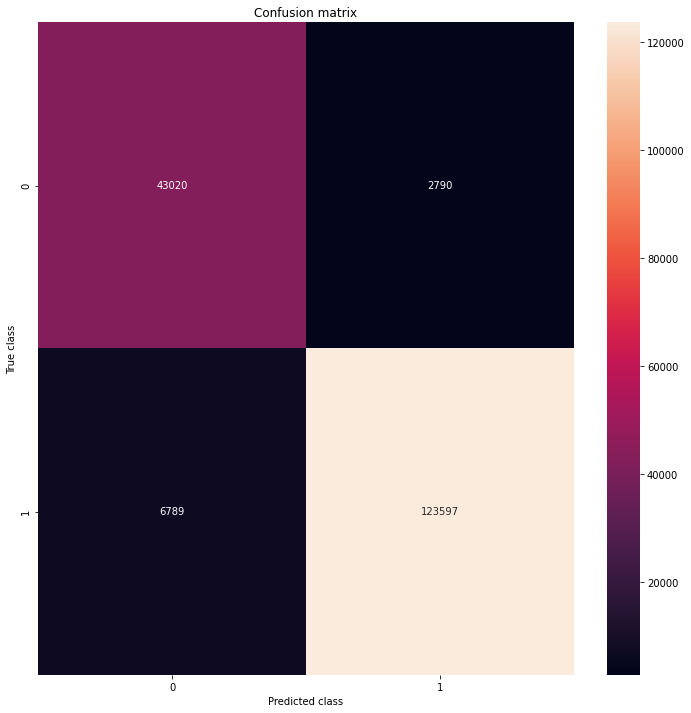

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     45810
           1       0.98      0.95      0.96    130386

    accuracy                           0.95    176196
   macro avg       0.92      0.94      0.93    176196
weighted avg       0.95      0.95      0.95    176196



In [15]:
show_results(y_test, pred_y_model_a)

In [16]:
model_b = run_model(X_train, X_test, y_train, y_test, clf_unbalanced)
pred_y_model_b = model_b.predict(X_test)

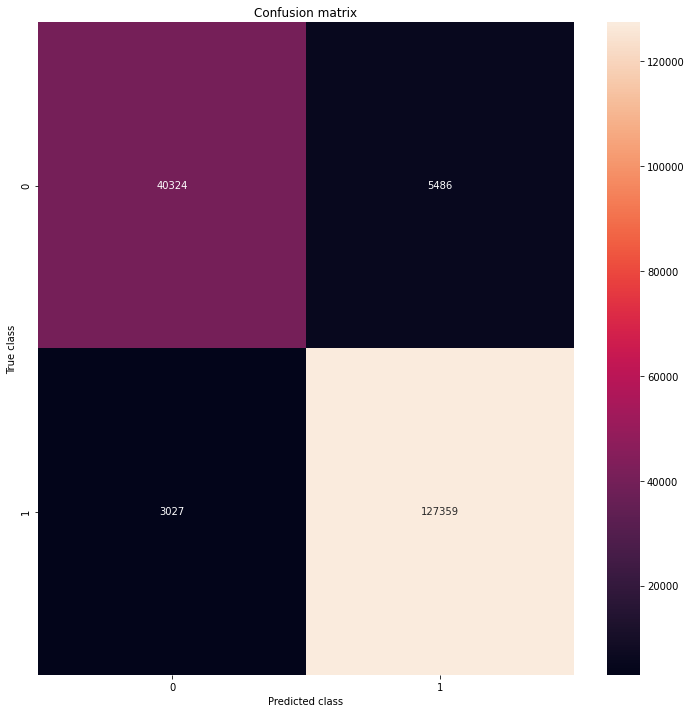

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     45810
           1       0.96      0.98      0.97    130386

    accuracy                           0.95    176196
   macro avg       0.94      0.93      0.94    176196
weighted avg       0.95      0.95      0.95    176196



In [17]:
show_results(y_test, pred_y_model_b)

In [18]:
from sklearn import metrics
# Predicting with a test dataset
#predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, pred_y_model_a))
print("Logistic Regression Precision:",metrics.precision_score(y_test, pred_y_model_a))
print("Logistic Regression Recall:",metrics.recall_score(y_test, pred_y_model_a))

Logistic Regression Accuracy: 0.9456344071375059
Logistic Regression Precision: 0.977924944812362
Logistic Regression Recall: 0.9479315263908702


In [19]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, pred_y_model_b))
print("Logistic Regression Precision:",metrics.precision_score(y_test, pred_y_model_b))
print("Logistic Regression Recall:",metrics.recall_score(y_test, pred_y_model_b))

Logistic Regression Accuracy: 0.9516844877295739
Logistic Regression Precision: 0.9587037524935075
Logistic Regression Recall: 0.9767843173346832


In [ ]:
#Balanced

In [22]:
result = model_a.predict(["I hate it, they were not too nice people", "I loved it, they were too nice people"])

In [23]:
result

array([0, 1])

In [24]:
#Unbalanced
model_b.predict(["I hate it, they were not too nice people", "I loved it, they were too nice people"])

array([1, 1])